In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import linear_model
import statsmodels.formula.api as smf

In [3]:
raw_df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', 
                         skiprows=4, skipfooter=3)

crime_df = raw_df.copy()


# create crime_df_clean based on Drill - Thinkful 
crime_df_clean = crime_df[['City', 'Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery']].copy()

columns = {'Murder and\nnonnegligent\nmanslaughter': 'Murder'}

crime_df_clean = crime_df_clean.rename(columns,axis=1)

crime_df_clean['Murder'] = [1 if b > 0 else 0 for b in crime_df_clean.Murder]

crime_df_clean['Robbery'] = [1 if b > 0 else 0 for b in crime_df_clean.Robbery]

crime_df_clean['Pop_squared'] = crime_df_clean.Population**2

In [4]:
crime_df.count()

City                                      348
Population                                348
Violent\ncrime                            348
Murder and\nnonnegligent\nmanslaughter    348
Rape\n(revised\ndefinition)1                0
Rape\n(legacy\ndefinition)2               348
Robbery                                   348
Aggravated\nassault                       348
Property\ncrime                           348
Burglary                                  348
Larceny-\ntheft                           348
Motor\nvehicle\ntheft                     348
Arson3                                    187
dtype: int64

In [5]:
crime_df.isna().sum()

City                                        0
Population                                  0
Violent\ncrime                              0
Murder and\nnonnegligent\nmanslaughter      0
Rape\n(revised\ndefinition)1              348
Rape\n(legacy\ndefinition)2                 0
Robbery                                     0
Aggravated\nassault                         0
Property\ncrime                             0
Burglary                                    0
Larceny-\ntheft                             0
Motor\nvehicle\ntheft                       0
Arson3                                    161
dtype: int64

In [6]:
crime_df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


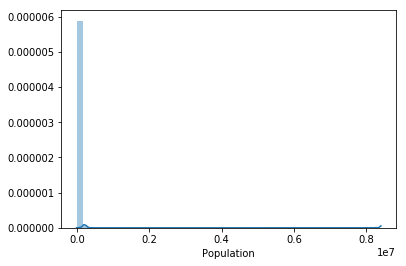

In [7]:
sns.distplot(crime_df_clean.Population)
plt.show()

In [8]:
crime_df.query('3000 < Population < 19000').count()

City                                      174
Population                                174
Violent\ncrime                            174
Murder and\nnonnegligent\nmanslaughter    174
Rape\n(revised\ndefinition)1                0
Rape\n(legacy\ndefinition)2               174
Robbery                                   174
Aggravated\nassault                       174
Property\ncrime                           174
Burglary                                  174
Larceny-\ntheft                           174
Motor\nvehicle\ntheft                     174
Arson3                                     80
dtype: int64

# Data Cleaning 

- Remove columns 'Rape (revised definition)1' and 'Arson3' due to amount of NaN values 
- Create heatmap to see how independent variables correlate 

### Model assumptions 
- linear relationship 
- multivariate normality 
- homoscedasticity 
- low multicollinearity 

_side note: all variables can be considered continous_

In [9]:
crime_df = raw_df.copy()
crime_df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [10]:
crime_df.drop(['Rape\n(revised\ndefinition)1','Arson3'],axis=1,inplace=True)

In [11]:
columns = {'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape',
           'Aggravated\nassault': 'Aggravated_assualt', 'Property\ncrime': 'Property_crime',
           'Larceny-\ntheft': 'Larceny_theft', 'Motor\nvehicle\ntheft': 'Vehicle_theft',
           'Violent\ncrime': 'Violent_crime'}
crime_df = crime_df.rename(columns,axis=1)


    
raw_columns = {'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape',
           'Aggravated\nassault': 'Aggravated_assualt', 'Property\ncrime': 'Property_crime',
           'Larceny-\ntheft': 'Larceny_theft', 'Motor\nvehicle\ntheft': 'Vehicle_theft',
           'Violent\ncrime': 'Violent_crime','Rape\n(revised\ndefinition)1':'Rape_1'}    

In [12]:
crime_df.head(1)

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0


In [13]:
crime_df.columns

Index(['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated_assualt', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Vehicle_theft'],
      dtype='object')

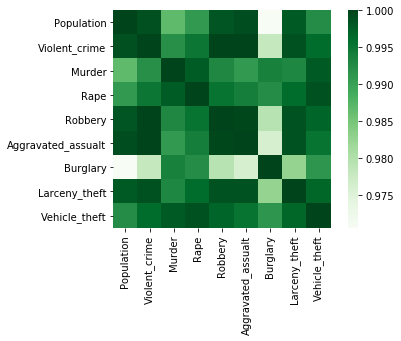

,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Burglary,Larceny_theft,Vehicle_theft
Population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.970578,0.997946,0.992421
Violent_crime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.978150,0.998762,0.996271
Murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.993733,0.993175,0.997992
Rape,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.992442,0.996260,0.998764
Robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.979525,0.998735,0.996927
Aggravated_assualt,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.976288,0.998561,0.995403
Burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,1.000000,0.982700,0.991464
Larceny_theft,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.982700,1.000000,0.996878
Vehicle_theft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.991464,0.996878,1.000000


In [14]:
id_variables = crime_df.columns
id_variables = id_variables[id_variables!="Property_crime"].drop("City",1)

# create heatmap to see how the independent variables correlate with each other 
corrmat = crime_df[id_variables].corr()
sns.heatmap(corrmat, cmap = 'Greens',square=True)
plt.show()

corrmat

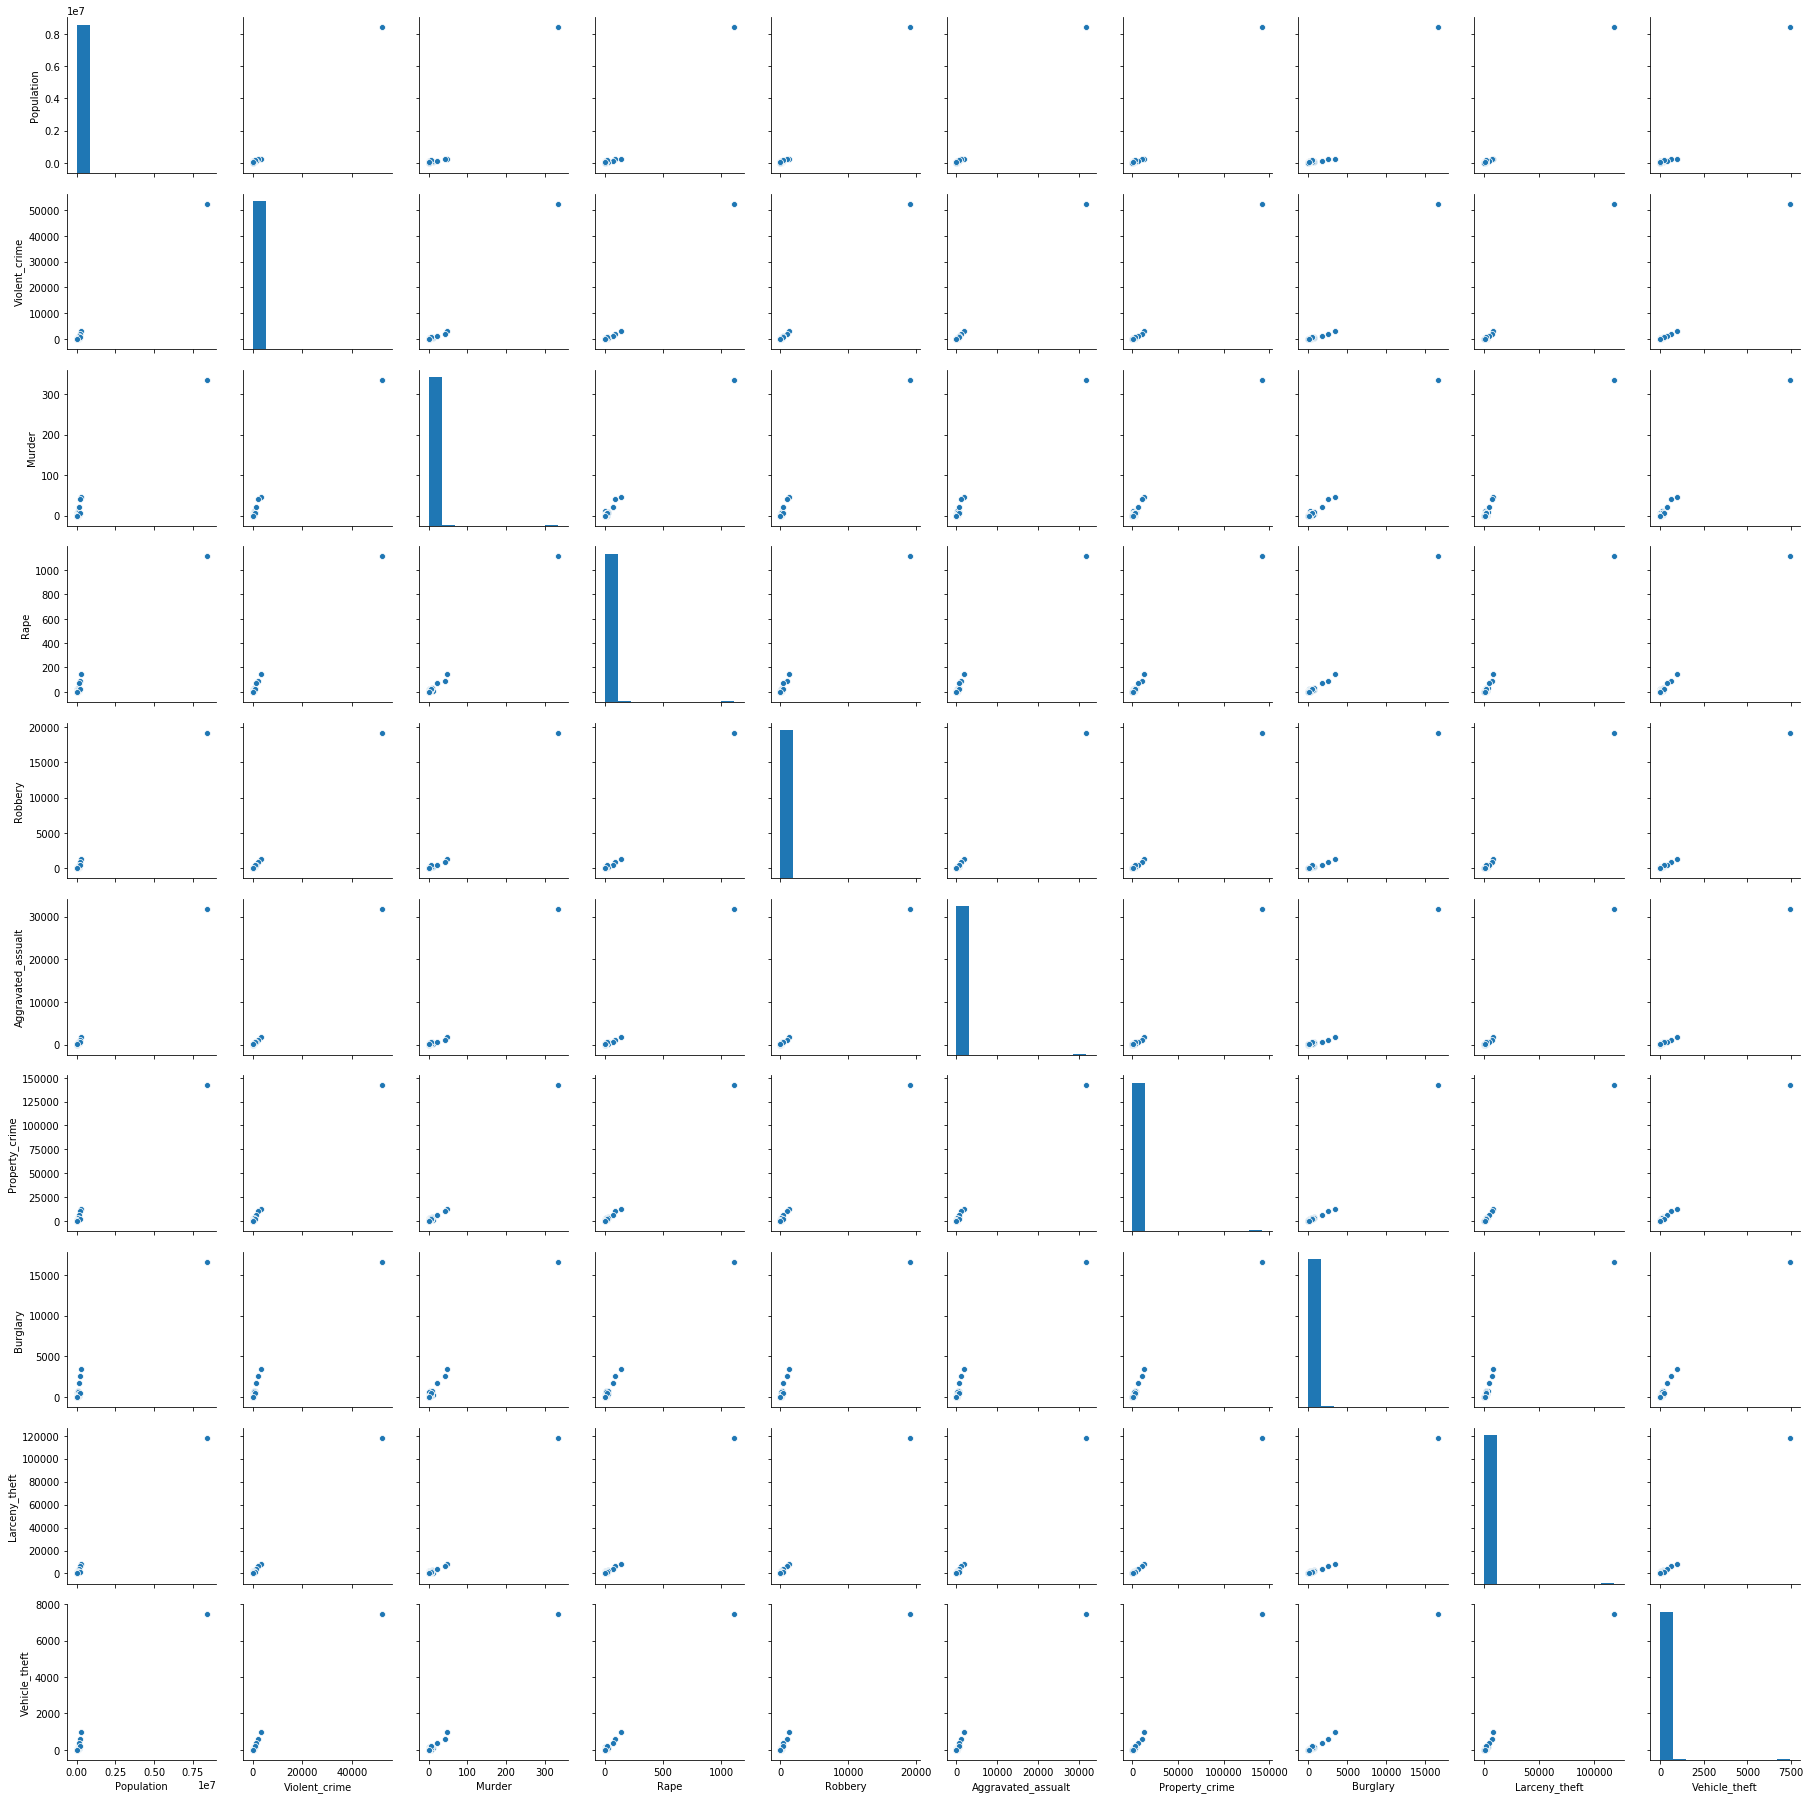

In [15]:
sns.pairplot(crime_df)
plt.show()

# we see there is a linear relationship between correlation between property crime and 
## the independent variables 
# We see that there is an outlier, so let's remove it 

In [16]:
# let's remove the city with the highest population 

outlier = crime_df[crime_df.Population == 
          crime_df.Population.max()]

crime_df.drop(outlier.index,axis=0,inplace=True)

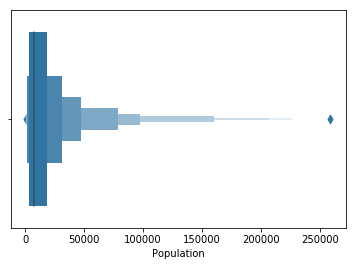

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957


In [17]:
# let's now check population boxplot 

sns.boxenplot(crime_df.Population)
plt.show()

# now there is one outlier, but we will leave it for now 
outlier = crime_df[crime_df.Population == 
          crime_df.Population.max()]

outlier

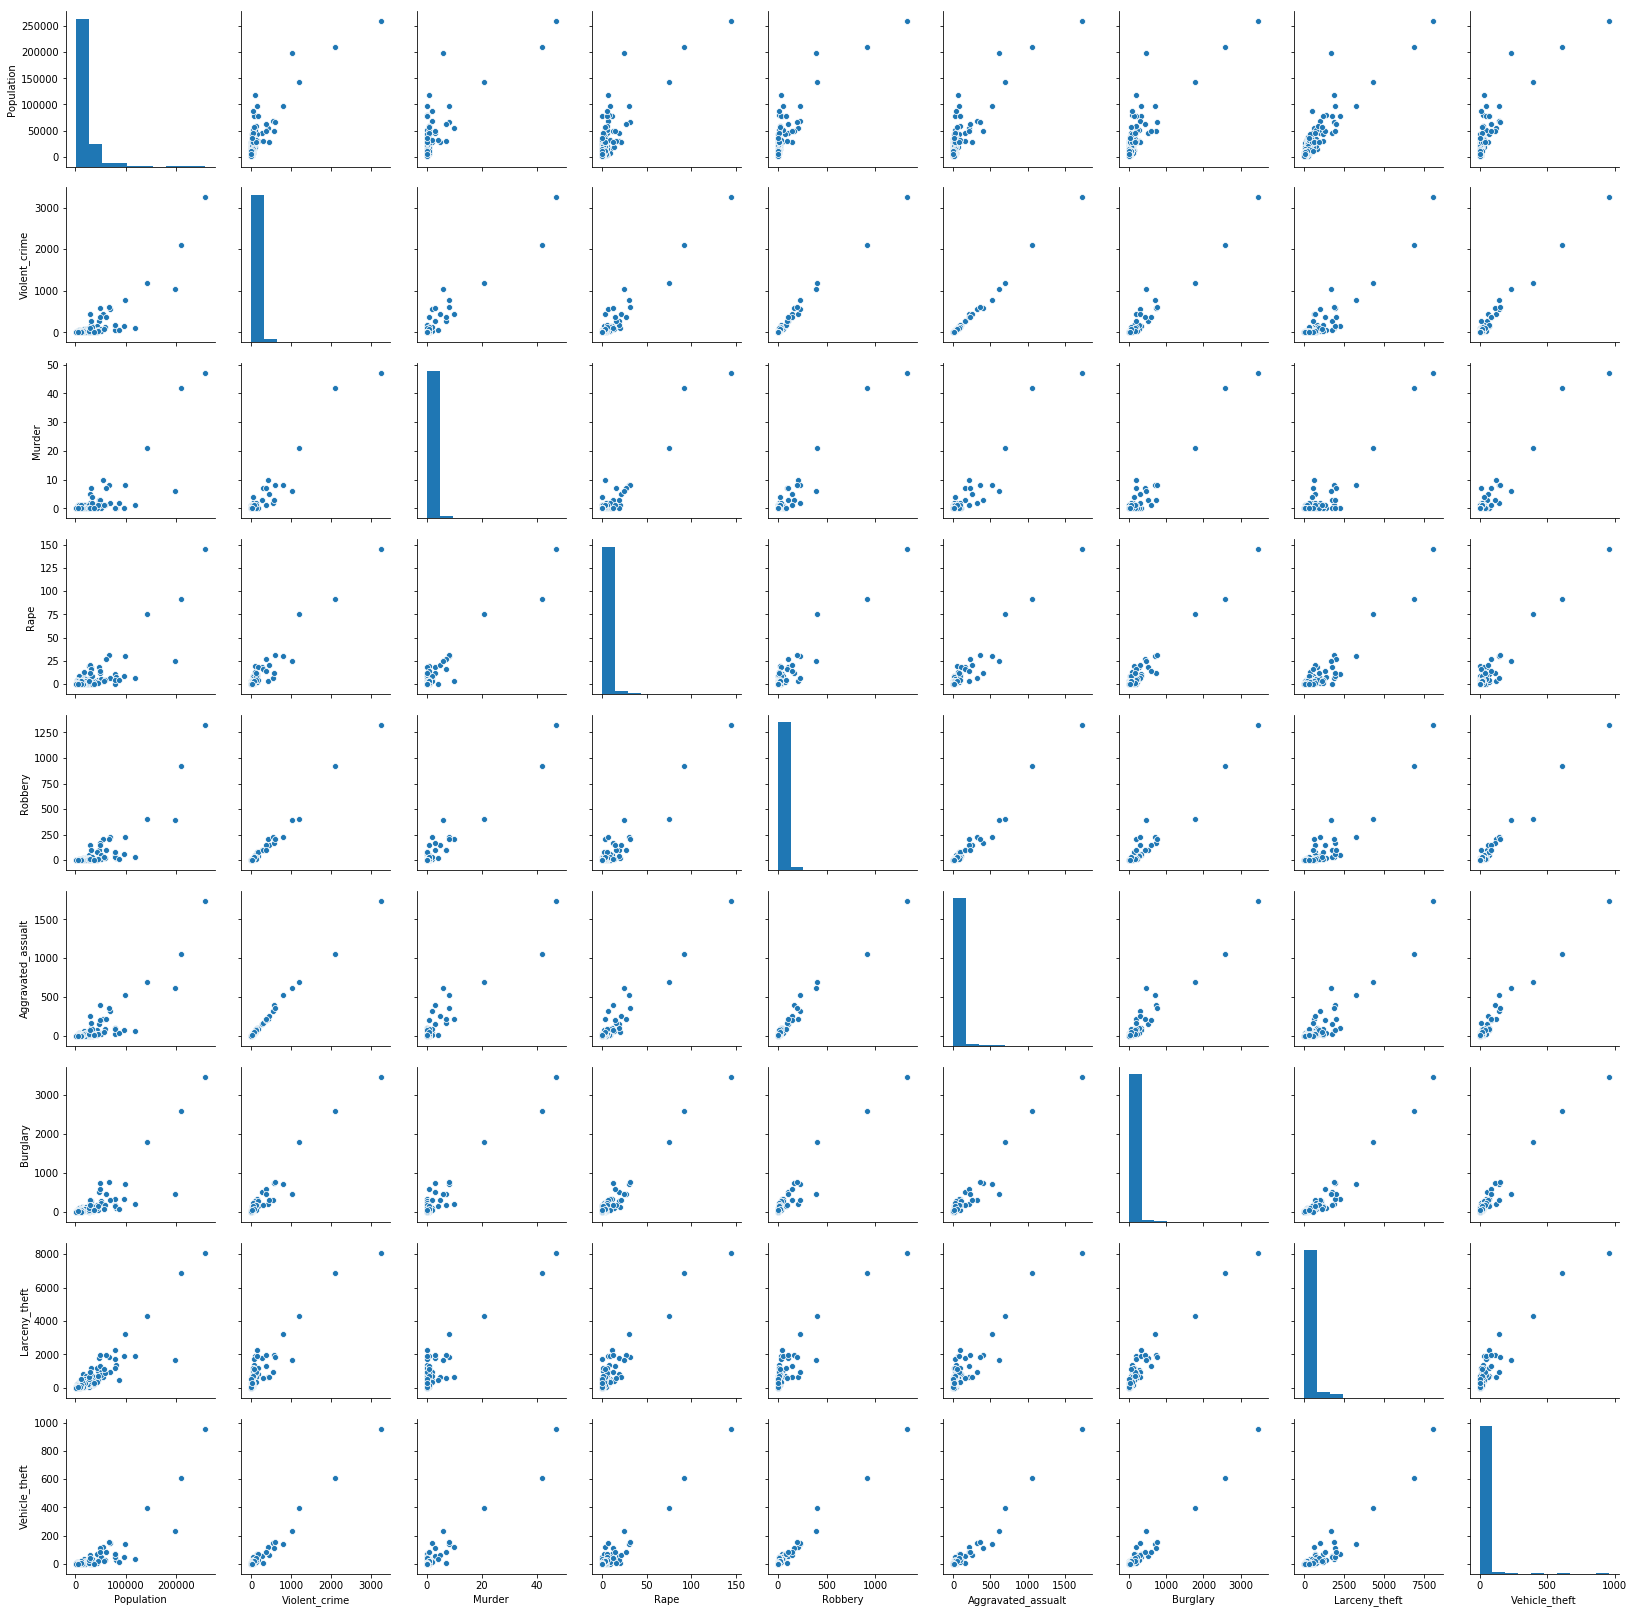

In [18]:
sns.pairplot(crime_df[id_variables])
plt.show()

In [19]:
crime_df.columns

Index(['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated_assualt', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Vehicle_theft'],
      dtype='object')

# Feature Engineering 
- Review how each variable compares to the target variable 
- Remove outliers if need be (create seperate dataframes) 
- Create new features if need be in order to ensure feature variables are linear 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


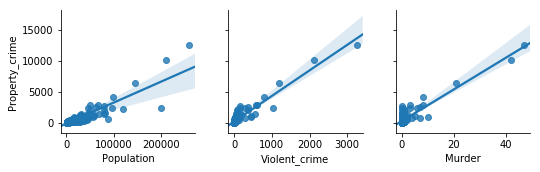

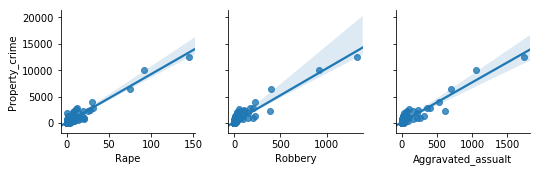

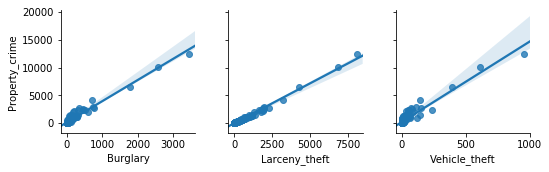

In [20]:
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Population', 'Violent_crime', 'Murder'],
                  kind='reg')

plt.show()
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Rape', 'Robbery','Aggravated_assualt'],
                  kind='reg')
plt.show()
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Burglary', 'Larceny_theft','Vehicle_theft'],
                  kind='reg')
plt.show()

Maybe create a seperate dataframe for outliers (create general rule) 

# Create New Dataframes based on Population 

Let's graph each individual variable vs. the target variable prior to setting new dataframe 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


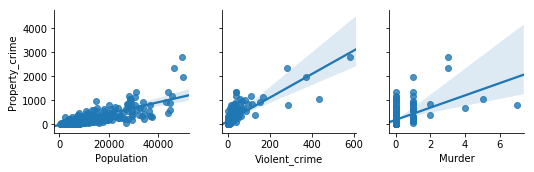

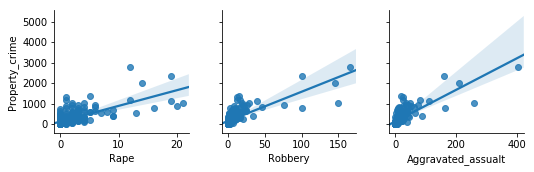

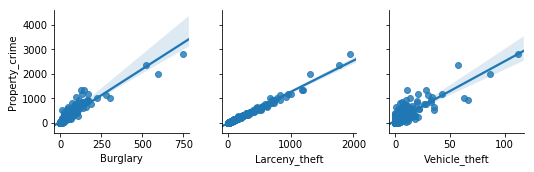

In [21]:
# less than 50,000

sns.pairplot(data=crime_df.query('50000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Population', 'Violent_crime', 'Murder'],
                  kind='reg')

plt.show()
sns.pairplot(data=crime_df.query('50000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Rape', 'Robbery','Aggravated_assualt'],
                  kind='reg')
plt.show()
sns.pairplot(data=crime_df.query('50000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Burglary', 'Larceny_theft','Vehicle_theft'],
                  kind='reg')
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


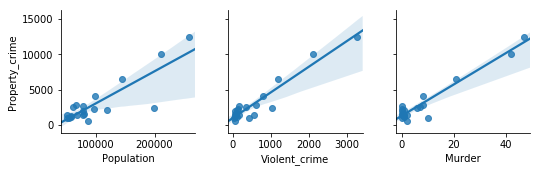

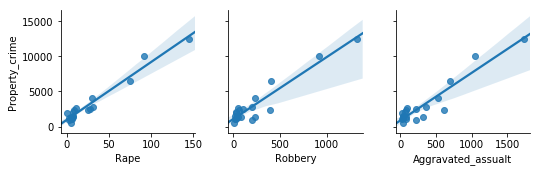

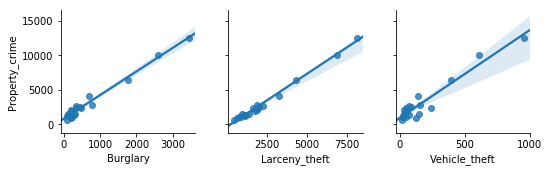

In [22]:
# greater than 50,000

sns.pairplot(data=crime_df.query('50000 < Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Population', 'Violent_crime', 'Murder'],
                  kind='reg')

plt.show()
sns.pairplot(data=crime_df.query('50000 < Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Rape', 'Robbery','Aggravated_assualt'],
                  kind='reg')
plt.show()
sns.pairplot(data=crime_df.query('50000 < Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Burglary', 'Larceny_theft','Vehicle_theft'],
                  kind='reg')
plt.show()

# Create dataframes
- small cities -> population of 50000 or less 
- large cities -> population greater than 50000
- create feature variables

In [23]:
small_cities = crime_df.query('50000 > Population').copy()
large_cities = crime_df.query('50000 < Population').copy()

## Feature Variables

In [24]:
small_cities["Sqr_Pop"] = small_cities.Population**2
small_cities.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Sqr_Pop
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,3463321
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,6640929
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,8099716
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,40806544
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,16719921


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


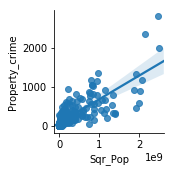

In [25]:
sns.pairplot(data=small_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Sqr_Pop'],
                  kind='reg')

In [26]:
small_cities["Sqrt_Pop"] = small_cities.Population.apply(np.sqrt)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


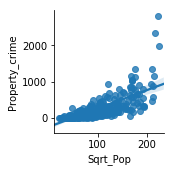

In [53]:
sns.pairplot(data=small_cities,
                  y_vars=['Property_crime'],
                  x_vars=["Sqrt_Pop"],
                  kind='reg')

In [54]:
large_cities["Sqr_Pop"] = large_cities.Population**2

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


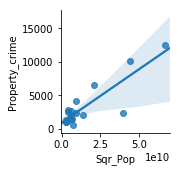

In [55]:
sns.pairplot(data=large_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Sqr_Pop'],
                  kind='reg')

In [56]:
large_cities["Sqrt_Pop"] = large_cities.Population.apply(np.sqrt)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


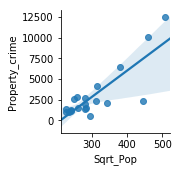

In [57]:
sns.pairplot(data=large_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Sqrt_Pop'],
                  kind='reg')

In [58]:
small_cities["Log_Pop"] = (small_cities.Population +1).apply(np.log)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


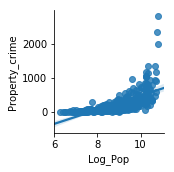

In [59]:
sns.pairplot(data=small_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Log_Pop'],
                  kind='reg')

In [34]:
small_cities["Burglary_sqrt"] = small_cities.Burglary.apply(np.sqrt)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


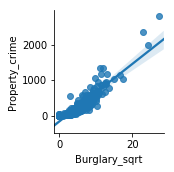

In [35]:
sns.pairplot(data=small_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Burglary_sqrt'],
                  kind='reg')

# Regression Models 

In [68]:
X = small_cities[["Burglary_sqrt","Sqr_Pop","Larceny_theft"]]
y = small_cities["Property_crime"]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [71]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.9892660475860919

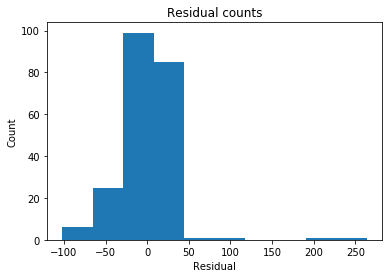

In [72]:
# Extract predicted values.
predicted = regr.predict(X_train).ravel()
actual = y_train

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [73]:
regr = linear_model.LinearRegression()
regr.fit(X_test, y_test)
regr.score(X_test, y_test)

0.9980239797070024

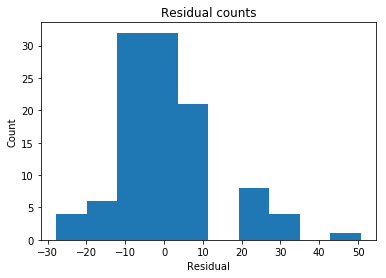

In [74]:
# Extract predicted values.
predicted = regr.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()